In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.ensemble import IsolationForest

In [12]:
df = pd.read_csv(
  "typicalyear_label.csv", 
  parse_dates=['timestamp'], 
  index_col="timestamp"
)

In [13]:
df['hour'] = df.index.hour
# df['day_of_month'] = df.index.day
# df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['value'] = df['value'] * 100

In [14]:
df

,value,Label,hour,month
timestamp,,,,
2017-05-10 00:00:00+09:00,0.000000,1,0,5
2017-05-10 01:00:00+09:00,0.000000,1,1,5
2017-05-10 02:00:00+09:00,0.000000,1,2,5
2017-05-10 03:00:00+09:00,0.000000,1,3,5
2017-05-10 04:00:00+09:00,0.000000,1,4,5
...,...,...,...,...
2021-05-07 16:00:00+09:00,453.262858,1,16,5
2021-05-07 17:00:00+09:00,448.537455,1,17,5
2021-05-07 18:00:00+09:00,266.143685,1,18,5


In [15]:
x_train = df[df['Label'] == 1]
x_outliers = df[df['Label'] == -1]


In [16]:
print(len(x_train))
print(len(x_outliers))

34844
110


In [25]:
x_outliers.query('hour == 22 and Label == -1 and value == 0' )

,value,Label,hour,month
timestamp,,,,


In [7]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(x_train)
y_pred_train = clf.predict(x_train[['value', 'hour', 'Label', 'month']])
# y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(x_outliers[['value', 'hour', 'Label', 'month']])

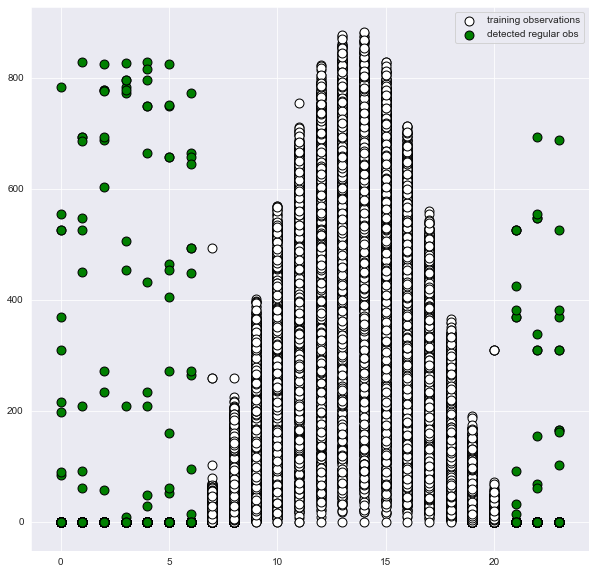

In [8]:
x_outliers = x_outliers.assign(y = y_pred_outliers)

plt.rcParams['figure.figsize'] = [10, 10]
p1 = plt.scatter(x_train.hour, x_train.value, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p3 = plt.scatter(x_outliers.hour, 
                 x_outliers.value, 
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()

In [22]:
# 최적값을 찾기 위한 루프 TODO gridsearchcv 필요
# max_predict_percent = 0
# for j in range(2000, 5000, 200):
#     for i in range(10, 80):
#         clf = IsolationForest(max_samples=j, contamination = 0.1, random_state=i)
#         clf.fit(x_train)
#     #     y_pred_train = clf.predict(x_train[['value', 'hour', 'Label', 'month']])
#         # y_pred_test = clf.predict(X_test)
#         y_pred_outliers = clf.predict(x_outliers[['value', 'hour', 'Label', 'month']])
#         if max_predict_percent < list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0]:
#             print(j, i, " ing..", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0], max_predict_percent)
#             max_predict_percent = list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0]
#     if max_predict_percent >= 1.0:
#         break
            
        

2000 10  ing.. 0.75 0
2000 11  ing.. 0.7571428571428571 0.75
2000 14  ing.. 0.7642857142857142 0.7571428571428571
2000 15  ing.. 0.7785714285714286 0.7642857142857142
2000 30  ing.. 0.7857142857142857 0.7785714285714286
3400 30  ing.. 1.0 0.7857142857142857


predict :  0.990909090909091


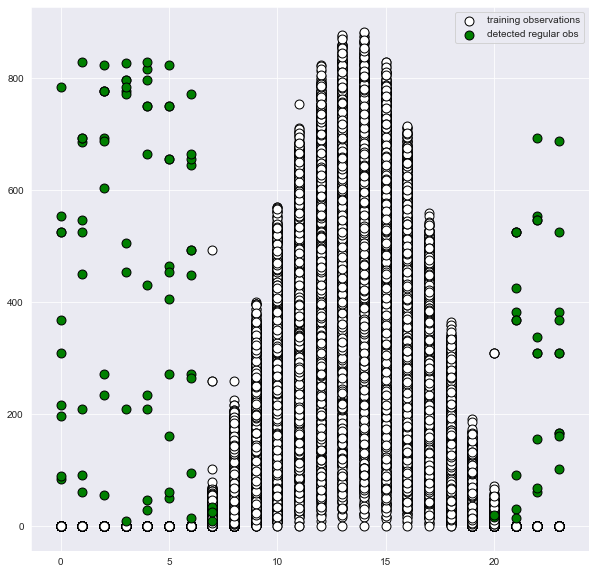

In [26]:
clf = IsolationForest(max_samples=3400, contamination = 0.1, random_state=68)
clf.fit(x_train)
y_pred_train = clf.predict(x_train[['value', 'hour', 'Label', 'month']])
y_pred_outliers = clf.predict(x_outliers[['value', 'hour', 'Label', 'month']])
print("predict : ", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

x_outliers = x_outliers.assign(y = y_pred_outliers)

plt.rcParams['figure.figsize'] = [10, 10]
p1 = plt.scatter(x_train.hour, x_train.value, c='white',
                 s=20*4, edgecolor='k', label="training observations")

p3 = plt.scatter(x_outliers[x_outliers.y==-1].hour, 
                x_outliers[x_outliers.y==-1].value,
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()

In [29]:
len(x_outliers[x_outliers.y == 1])

1

# x_outliers

In [30]:
# print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

이상치 데이터셋에서 정확도: 0.990909090909091
